In [6]:
import os

from glob import glob
from os.path import basename, exists, join, dirname
import pandas as pd
from src.config import ROOT_DIR, RESULTS
import pickle
os.chdir(ROOT_DIR)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from src.external.pyvenn import venn

In [15]:
from matplotlib_venn import venn2

In [2]:
outdir = "data/processed/2020_11_18_Croker_mito"
outdir_cov = join(outdir, "coverage")

In [3]:
samples = pd.read_csv("parameters/2020_11_18_Croker_mito.csv")
samples

,sample,raw,barcode_f,bam_f
0,PBMC_J,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...
1,PBMC_P,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...


In [4]:
from src.utils.parse_config import *
p = read_config_file("parameters/2020_11_18_Croker_mito.yaml")
p

{'samples': 'parameters/2020_11_18_Croker_mito.csv',
 'results': 'data/processed/mttrace/2020_11_18',
 'figures': 'figures/mttrace/2020_11_18',
 'main': ['mtscATAC'],
 'use_cellr_barcode': [True],
 'num_reads_filter': [200],
 'mito_character': 'chrM',
 'maxBP': 16571,
 'mapq': [0],
 'ref_fa': '/data2/mito_lineage/data/external/GRCh38_MT_blacklist/fasta/genome.fa',
 'mt_ref_fa': '/data2/mito_lineage/data/external/GRCh38_MT_blacklist/chrM.fasta',
 'min_cells': [100, 500, 10],
 'min_reads': [100],
 'top_cells': [0],
 'top_pos': [0],
 'cell_mt_coverage': [10, 100],
 'position_bq_thresh': [0, 'Gaussian']}

In [5]:
samples

,sample,raw,barcode_f,bam_f
0,PBMC_J,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...
1,PBMC_P,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...


In [8]:
samples['cellr_barcode_filt_f'] = samples['bam_f'].apply(lambda x: join(dirname(x),"filtered_peak_bc_matrix","barcodes.tsv"))
samples


,sample,raw,barcode_f,bam_f,cellr_barcode_filt_f
0,PBMC_J,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...
1,PBMC_P,NaN,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...,/data2/isshamie/mito_lineage/data/processed/mt...


In [11]:
barcodes_dict = {}
for ind, val in samples.iterrows():
    barcodes_dict[val["sample"]] = pd.read_csv(val["cellr_barcode_filt_f"], header=None)

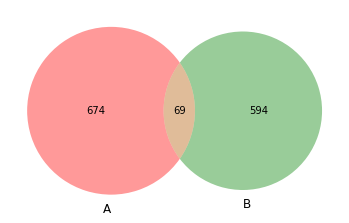

In [18]:
%matplotlib inline
venn2(subsets=[set(barcodes_dict["PBMC_J"][0].values),set(barcodes_dict["PBMC_P"][0].values)])

In [19]:
set(barcodes_dict["PBMC_J"][0].values).intersection(set(barcodes_dict["PBMC_P"][0].values))

{'AACATCGGTCATTGGT-1',
 'AACCAACCAGAATGCG-1',
 'AACGAGGGTGCTAGTT-1',
 'AACTGGTCAACATAAG-1',
 'AACTGTGAGCGCCTAC-1',
 'AAGATAGCAATTGGCT-1',
 'AAGATAGGTCCTTATT-1',
 'AAGGAGCCACTAGGAG-1',
 'AATACGCCAAACCTAC-1',
 'AATGGAAAGCTTCAAC-1',
 'ACAAGCTCATCATGTG-1',
 'ACAGACTGTCCGAGCT-1',
 'ACAGCGCGTTTGCGAT-1',
 'ACATGCAGTGCGCTCA-1',
 'ACCGAATTCTGGACAT-1',
 'ACTACCCCACTCAAGT-1',
 'ACTAGGTTCGGATAAA-1',
 'ACTATTCTCCCAATGA-1',
 'AGCGATTGTTCCTATT-1',
 'AGGCGAATCACAACAC-1',
 'ATCCTGCAGTCGTGAG-1',
 'ATCGAGTGTAAGGTCG-1',
 'ATTCGTTAGAACCCGA-1',
 'CAAGGCCTCATGAACC-1',
 'CAAGGCCTCCGCTCTA-1',
 'CAATCCCCAATGCCAT-1',
 'CAGCTGGTCTATCTAC-1',
 'CCTATTAGTAGCAGCA-1',
 'CCTGCTATCCAGTTAG-1',
 'CGCACAGGTAGTCCAT-1',
 'CGTACAAGTGAGTAAT-1',
 'CTCAGAACATGTAGAA-1',
 'CTCTACGGTTCCGGCA-1',
 'CTGGGACCAGTCAGAG-1',
 'CTTGTCGGTATTGTCG-1',
 'GAGCGCTCACCACCAG-1',
 'GATTGACTCTCCACTG-1',
 'GCAGATTAGGTACACG-1',
 'GCAGCCAAGCGTTAGG-1',
 'GCCATAACACGCTCAG-1',
 'GCGAGTCGTCTAACCA-1',
 'GGAACTTCAAAGCTGG-1',
 'GGAGGATCACTCGCAG-1',
 'GGAGGATTC